In [1]:
br = "\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import nltk
import folium
from wordcloud import WordCloud

import plotly.graph_objs as go 
import plotly as py
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)



import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
path = ('/Users/maryyoussef/Desktop/Clean GTD Copts/GTD_Copts_All.csv')

df = pd.read_csv(path)

/Users/maryyoussef/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (24,52,82,88,97,103,104,105) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
# col_remove_1 = ['INT_ANY', 'INT_IDEO', 'INT_LOG', 'INT_MISC', 'approxdate', 'attacktype3', 
#                        'attacktype3_txt', 'claim2', 'claim3', 'claimmode2', 'claimmode2_txt', 
#                        'claimmode3', 'claimmode3_txt', 'dbsource', 'eventid', 'extended', 'gname3', 
#                        'gsubname3', 'guncertain3', 'related', 'resolution', 'weapsubtype3', 
#                        'weapsubtype3_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weaptype3', 
#                        'weaptype3_txt', 'weaptype4', 'weaptype4_txt']

col_remove = ['attacktype2', 'attacktype2_txt', 'compclaim', 'corp2', 'corp3', 'doubtterr', 'guncertain1', 'guncertain2', 'natlty3', 'natlty3_txt', 'nhostkidus', 
                       'ransomamtus', 'ransompaidus', 'specificity', 'targsubtype3', 'targsubtype3_txt', 
                       'targtype3', 'targtype3_txt', 'vicinity', 'nwoundus']


df = df.drop(columns=col_remove)


df = df.replace(r'^\s*$', np.nan, regex=True)

In [5]:
key_word = ['coptic']     #identify word to search

    
search = ['summary', 'location', 'motive', 'propcomment', 'addnotes', 'target1', 'target2', 'target3', 'scite1', 
          'scite2', 'scite3', 'corp1', 'ransomnote']   #specify which features to look in



for i in search:
    df[i] = df[i].str.lower()   #lowercase words so search words properly 

pattern = '|'.join(key_word)
#print(pattern)

def SearchWords(ColName):
    church = df[df[ColName].str.contains(pattern, na=False)]   # funtion to search through above columns
    return church

In [6]:
searched = [] 

for i in search:
        searched.append(i+'_search')
        globals()[i+'_search'] = SearchWords(i)  #naming each column search to variable name and '_search'

In [7]:
searchedquo = "'summary_search', 'location_search', 'motive_search', 'propcomment_search', \
        'addnotes_search', 'target1_search', 'target2_search', 'target3_search', 'scite1_search', \
        'scite2_search', 'scite3_search', 'corp1_search', 'ransomnote_search'"
searched = (searchedquo.replace("'", ""))

In [8]:
church = pd.concat([summary_search, location_search, motive_search, propcomment_search, addnotes_search, 
                    target1_search, target2_search, target3_search, scite1_search, scite2_search, 
                    scite3_search, corp1_search, ransomnote_search]) # concatenating all searches together to 
                                                                    # 1 df called church

church = church.drop_duplicates()   # dropping duplicates from searching for Coptic in same row
print(len(church))

64


In [9]:
#church.head()

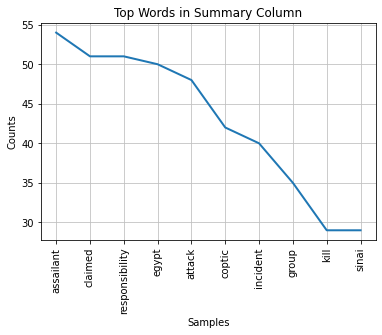

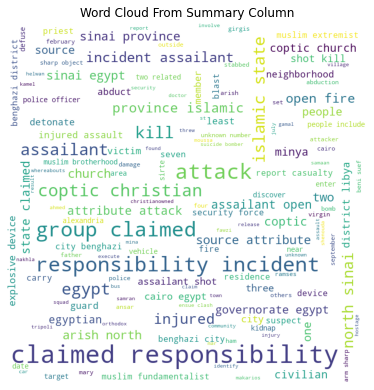

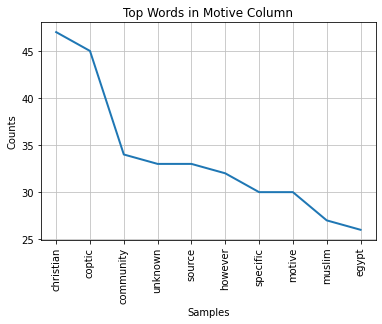

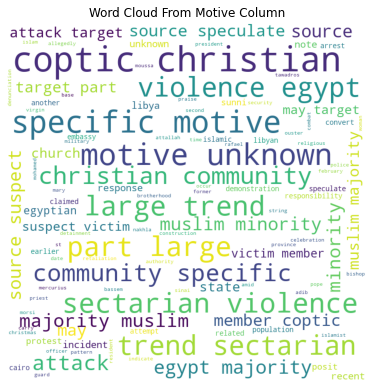

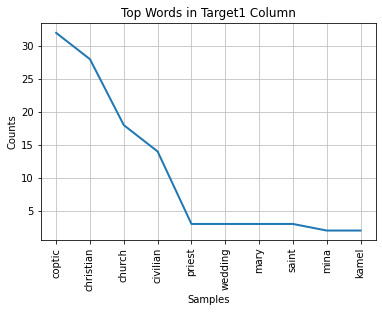

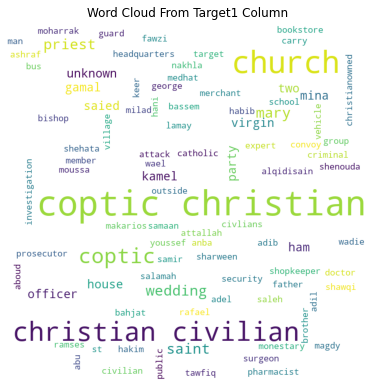

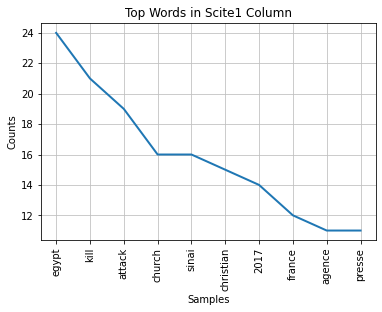

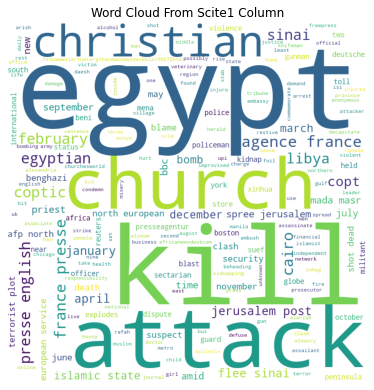

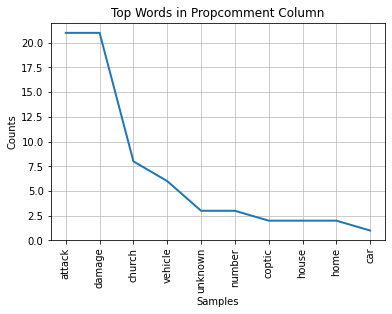

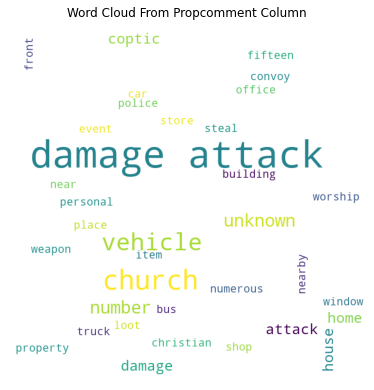

In [10]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud


def TextAnalysis(column):
    # Putting all of column content to 1 string
    sentence = church[column].tolist()
    sentence = str(sentence)

    # Initializing punctuations string  
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  
    # Removing punctuations in string 
    # Using loop + punctuation string   
    for ele in sentence:  
        if ele in punc:  
            sentence = sentence.replace(ele, "")     
    
    # Tokenizing word to remove stop words
    tokenized_word=word_tokenize(sentence)
   
    # Remove stop words and adding nan and al from empty values and city name
    stop_words=set(stopwords.words("english"))
    stop_words.add('nan')
    stop_words.add('al')
    
    # Filtering sentence to remove stop words
    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)
    
    # Lemmatize with POS Tag --> https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    # Making filtered sentence single string to lemmatize
    filtered_sent = ' '.join(filtered_sent)
    
    # Init Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize string with the appropriate POS tag
    sentfinal = ([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(filtered_sent)])
    #print(sentfinal)

    # Print freq of words in final clean sentence
    fdist = FreqDist(sentfinal)
    
    # Making sentence a string from a list for word cloud
    str_sentfinal = ' '.join(map(str, sentfinal))
     
    #Printing top 5 most common words and freq.
    #print(fdist.most_common(5))
    
    fig1 = plt.figure()
    
    # Plotting top 30 words
    title = "Top Words in {} Column".format(column.capitalize())
    fdist.plot(10, cumulative=False, title=title)
    plt.title(title)
    fdist_fig_name = str(column) + '_fdist.jpg'  
    fig1.savefig(fdist_fig_name, bbox_inches = "tight")

    # if using a Jupyter notebook, include:
    %matplotlib inline

    wordcloud = WordCloud(width = 700, height = 700, 
                    background_color ='white', 
                    min_font_size = 10).generate(str_sentfinal) 

    
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    titlewc = "Word Cloud From {} Column".format(column.capitalize())
    plt.title(titlewc)
    wc_fig_name = str(column) + '_wordcloud.jpg'
    plt.savefig(wc_fig_name)
    plt.show()
    
    
#summary, motive, target1, scite1, propcomment
TextAnalysis('summary')
TextAnalysis('motive')
TextAnalysis('target1')
TextAnalysis('scite1')
TextAnalysis('propcomment')

In [11]:
findword = 'claimed'
numwords = 20
claimed = []

# Making entire column single string to analyze
summs = church['summary'].tolist()
summs = str(summs)

# Printing 12 words before and after word claimed if found
for i in summs.split('\n'):
    z = i.split(' ')

    for x in [x for (x, y) in enumerate(z) if findword in y]:
        claimed.append(' '.join(z[max(x-numwords,0):x+numwords+1]))
        
#pprint.pprint(claimed)

however = []
other = []
howev = 'however'

#If word has claimed, looking into which attacks had 'no group'

for i in claimed: 
    if howev in i:
        however.append(i)
    else:
        other.append(i)

#pprint.pprint(however)

In [12]:
# Renaming district names according to loaded data frame
church['provstate'] = church['provstate'].replace(['Asyut'],'Assiut')
church['provstate'] = church['provstate'].replace(['Beheira'],'Behera')
church['provstate'] = church['provstate'].replace(['Faiyum'],'Fayoum')
church['provstate'] = church['provstate'].replace(['Minya'],'Menia')
church['provstate'] = church['provstate'].replace(['Quena'],'Qena')
church['provstate'] = church['provstate'].replace(['Sohag'],'Suhag')
church['provstate'] = church['provstate'].replace(['Quena'],'Qena')
church['provstate'] = church['provstate'].replace(['Sirte'],'Sirt')
church['country'] = church['country'].replace(['United States'], 'USA-states')

In [13]:
sets = ['country_txt', 'region_txt', 'provstate', 'city',  'gname', 'gsubname', 'gname2', 
        'gsubname2', 'weaptype1_txt', 'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt']

for i in sets:
    globals()[i+'_set'] = set(church[i])


Text(0, 0.5, 'Count')

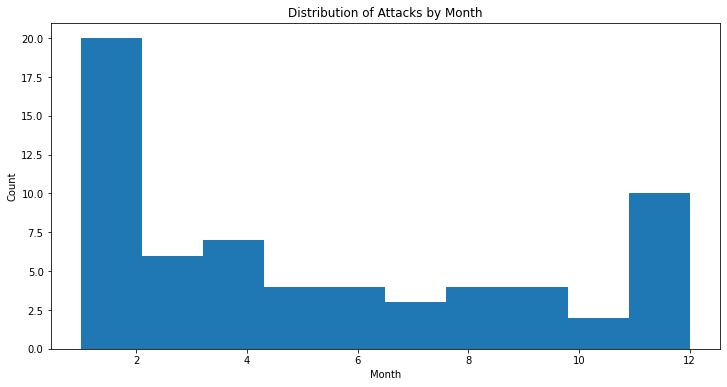

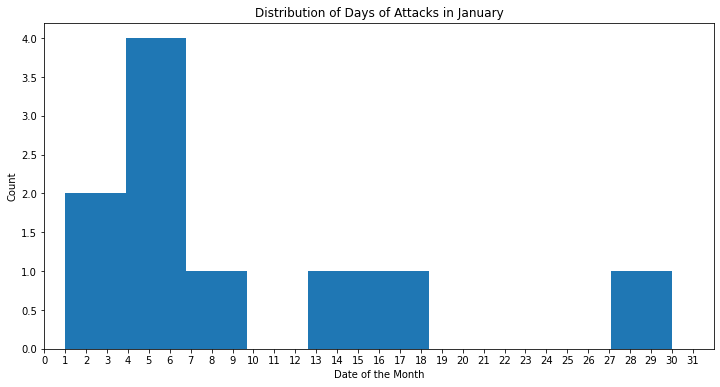

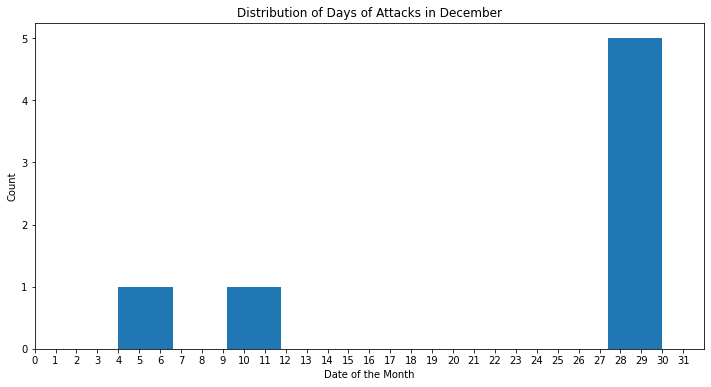

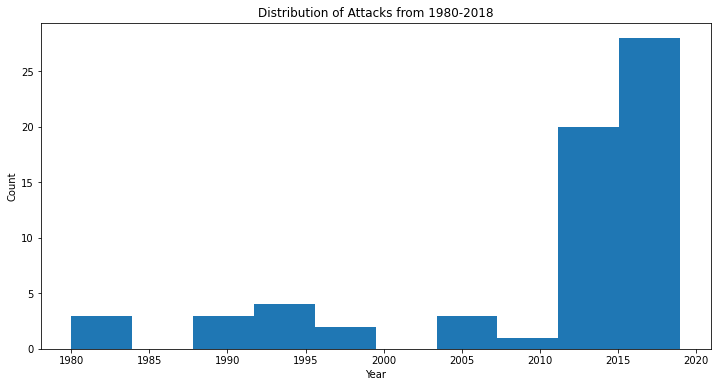

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = church['imonth'])
plt.title('Distribution of Attacks by Month')
plt.xlabel("Month")
plt.ylabel("Count")
#plt.savefig('DistMonths.jpg')

jan = church[church['imonth'] == 1]
dec = church[church['imonth'] == 12]

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = jan['iday'])
plt.title('Distribution of Days of Attacks in January')
plt.xlabel("Date of the Month")
plt.xticks(np.arange(0, 32))
plt.ylabel("Count")
ax.set_xlim(xmin=0, xmax=32, )
# #plt.savefig('DistDaysAttacksJan.jpg')

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = dec['iday'])
plt.title('Distribution of Days of Attacks in December')
plt.xlabel("Date of the Month")
plt.xticks(np.arange(0, 32))
plt.ylabel("Count")
ax.set_xlim(xmin=0, xmax=32, )
# #plt.savefig('DistDaysAttacksDec.jpg')

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = church['iyear'])
plt.title('Distribution of Attacks from 1980-2018')
plt.xlabel("Year")
plt.ylabel("Count")
# plt.savefig('DistYearsAttacks.jpg')

In [15]:
rans = church[church['ransompaid'] > 0]
#pd.set_option("display.max_colwidth", -1)  # to view all data in row

rans2 = rans[['target1', 'summary', 'motive', 'ransomamt', 'ransompaid']]
rans2.head()

#pd.reset_option('^display.', silent=True)    # to reset setting back to condensed df view

,target1,summary,motive,ransomamt,ransompaid
126267,surgeon: wadie ramses,06/14/2014: assailants opened fire on the vehi...,"the specific motive is unknown; however, sourc...",1400000.0,200000.0
126268,merchant: gamal shenouda,06/16/2014: assailants abducted gamal shenouda...,"the specific motive is unknown; however, sourc...",-99.0,41943.0


Text(0, 0.5, 'Count')

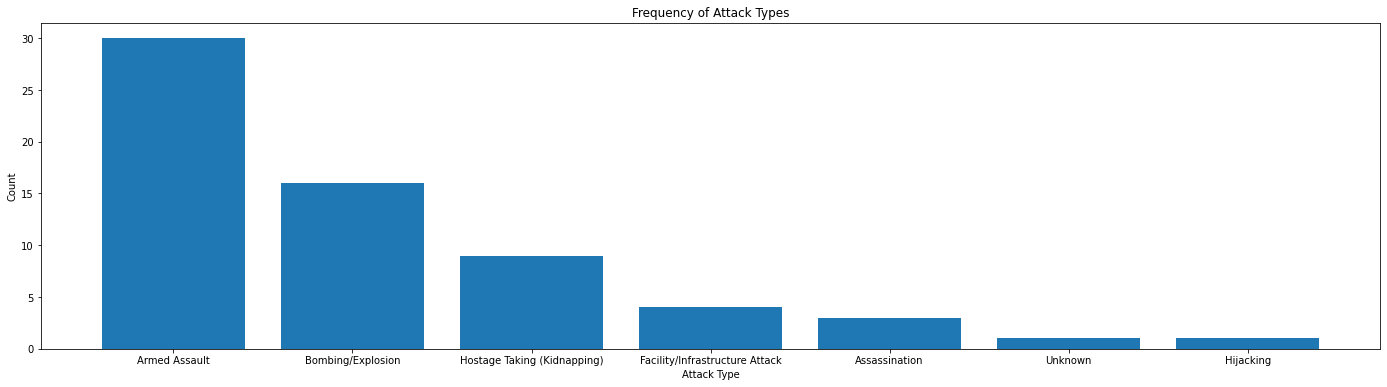

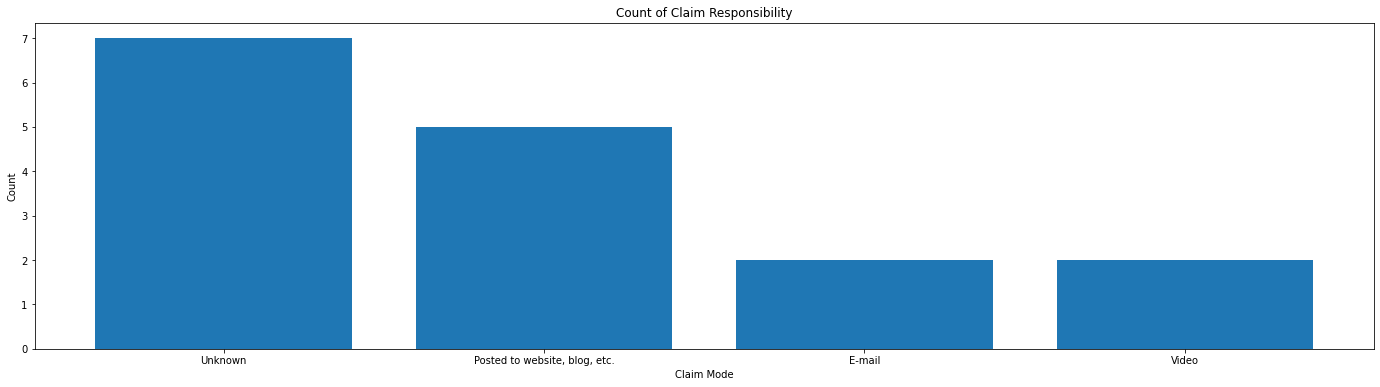

In [16]:
attack = church['attacktype1_txt'].value_counts()
attack = attack.to_dict()


fig = plt.figure(figsize=(24, 6))
plt.bar(x = attack.keys(), height = attack.values(), )
plt.title('Frequency of Attack Types')
plt.xlabel("Attack Type")
plt.ylabel("Count")
# plt.savefig('FreqAttacks.jpg')

compclaim = church['claimmode_txt'].value_counts()
compclaim = compclaim.to_dict()


fig = plt.figure(figsize=(24, 6))
plt.bar(x = compclaim.keys(), height = compclaim.values(), )
plt.title('Count of Claim Responsibility')
plt.xlabel("Claim Mode")
plt.ylabel("Count")
# plt.savefig('ClaimMode.jpg')

In [17]:
get_ipython().run_line_magic('matplotlib', 'inline')

fig = px.scatter_mapbox(church, lat="latitude", lon="longitude",zoom=3, height=300, 
                         color='attacktype1_txt', 
                         custom_data = ['city', 'iyear', 'gname', 'nkill', 'nwound', 'target1'])

fig.update_traces(
    hovertemplate="<br>".join([
        "City: %{customdata[0]}",
        "Year: %{customdata[1]}",
        "Group Name: %{customdata[2]}",
        "Killed: %{customdata[3]}",
        "Wounded: %{customdata[4]}",
        "Target: %{customdata[5]}"
            ]))


fig.update_layout(
    # add a title text for the plot
    title_text = 'Number Killed by Terrorist Acts across the Afrian Continent',

    geo_scope = 'africa' , # can be set to north america | south america | africa | asia | europe | usa 
    mapbox_style="white-bg",
    mapbox_layers=[
        {   "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
                ]
            }
          ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

import chart_studio

#    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~

username = 'mry8ea' # your username
api_key = 'QPR3L9tJz8eTSJkuvdzN' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

# import chart_studio.plotly as py
# py.plot(fig, filename = 'Coptic Persecution', auto_open=True)